In [177]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import pickle

In [163]:
data=pd.read_csv("diabetes.csv")
data.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
758                     0.197   26        0  
759                     0.278   66        1  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [164]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [142]:
data.isnull().sum()

Unnamed: 0                  0
GlucosePregnancies          0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [143]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [144]:
x= data.iloc[:,:-1]
y= data.iloc[:,-1:]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=56)

In [146]:
X_train.head()

Unnamed: 0  GlucosePregnancies  BloodPressure  SkinThickness  Insulin  \
18            1                 103             30             38       83   
8             2                 197             70             45      543   
178           5                 143             78              0        0   
658          11                 127            106              0        0   
563           6                  99             60             19       54   

      BMI  DiabetesPedigreeFunction  Age  
18   43.3                     0.183   33  
8    30.5                     0.158   53  
178  45.0                     0.190   47  
658  39.0                     0.190   51  
563  26.9                     0.497   32

In [147]:
y_train.head()

Outcome
18         0
8          1
178        0
658        0
563        0

In [148]:
model= DecisionTreeClassifier(max_leaf_nodes=15, random_state=56)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=56)

In [149]:
y_pred= model.predict(X_test)


In [150]:
accuracy_score(y_test, y_pred)

0.7291666666666666

In [151]:
tree= tree.export_text(model)
print(tree)

|--- feature_1 <= 108.50
|   |--- feature_0 <= 6.50
|   |   |--- class: 0
|   |--- feature_0 >  6.50
|   |   |--- feature_6 <= 0.22
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.22
|   |   |   |--- class: 1
|--- feature_1 >  108.50
|   |--- feature_5 <= 27.45
|   |   |--- class: 0
|   |--- feature_5 >  27.45
|   |   |--- feature_1 <= 155.50
|   |   |   |--- feature_7 <= 27.50
|   |   |   |   |--- feature_6 <= 0.90
|   |   |   |   |   |--- feature_3 <= 8.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  8.50
|   |   |   |   |   |   |--- feature_5 <= 47.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_5 >  47.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.90
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  27.50
|   |   |   |   |--- feature_4 <= 107.50
|   |   |   |   |   |--- feature_2 <= 75.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  

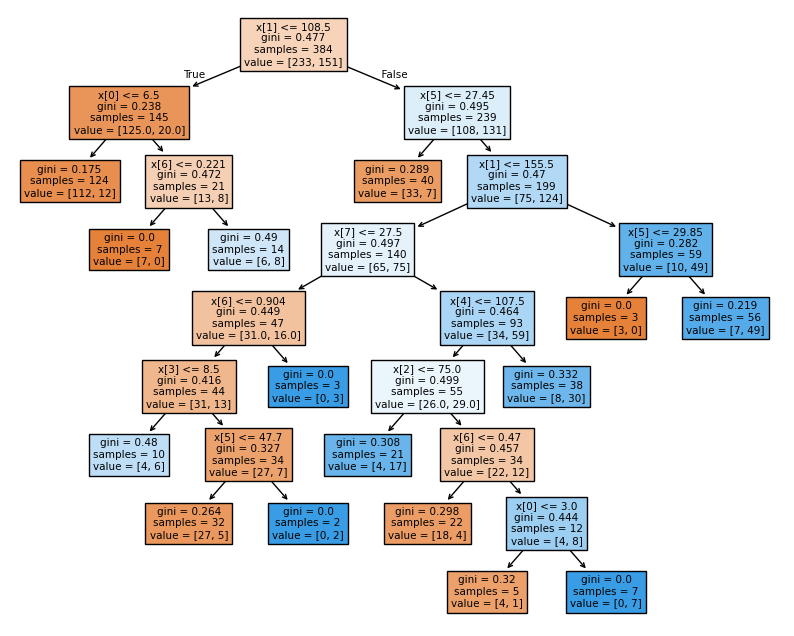

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10,8))
tree.plot_tree(model, filled=True)
plt.show()

In [153]:
sample = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [130],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [90],
    'BMI': [25.0],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [45]
})

input_array= sample.to_numpy()

prediction = model.predict(input_array)
print(prediction)

[0]


In [154]:
print(model.score(x,y))

0.7890625


In [155]:
print(confusion_matrix(y, model.predict(x)))

[[411  89]
 [ 73 195]]


In [156]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       500
           1       0.69      0.73      0.71       268

    accuracy                           0.79       768
   macro avg       0.77      0.77      0.77       768
weighted avg       0.79      0.79      0.79       768



In [159]:
with open('diabetese_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)